In [4]:
import re
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.cross_validation import train_test_split

C:\Users\User.AM0001395D\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\User.AM0001395D\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
df=pd.read_csv("auto-data.csv")

In [7]:
df=df.drop(['sold'], axis=1)
df.head()

,brand,model,price,year,Color,Body_Style,Horsepower,Hand_Drive,Engine_Cylinders,Engine,Engine_Volume,Interior_Color,Mileage,Gearbox,Drive_train
0,Toyota,Camry,8800.0,2010,black,Sedan,181.0,Left,4,Petrol,2.5,Grey,88000.0,Automatic,Front
1,BMW,318,4000.0,2001,Silver,Sedan,118.0,Left,6,Petrol,1.9,black,190000.0,Mechanical,Rear
2,BMW,X5,15000.0,2008,black,Truck:,286.0,Left,6,Diesel,3.0,black,170000.0,Automatic,Wheel drive
3,BMW,323,4500.0,2000,black,Sedan,170.0,Left,6,Petrol,2.5,Beige,300000.0,Automatic,Rear
4,Lexus,ES 350,24500.0,2012,black,Sedan,277.0,Left,6,Petrol,3.5,black,81000.0,Automatic,Front


In [8]:
X=df.drop(['price'], axis=1)

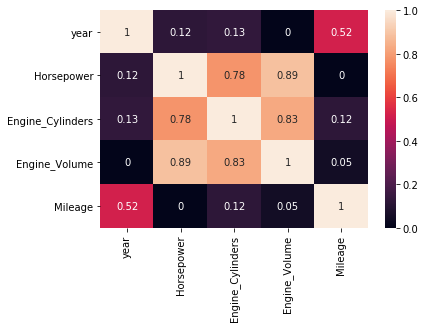

In [9]:
sns.heatmap(X.corr().abs().round(2),annot=True)

In [10]:
#this graph shows that there are some correlated variables so we should simplify our model
#it is natural that the number of cylinders is corr with engine volume-more cylinderes more volume, 0.83
#more volume more horspower 0.78, more horspower more cylinder0.89 , 
#let remove cylinders to eliminate 2 highes correlations

In [11]:
X=X.drop(['Engine_Volume'], axis=1)

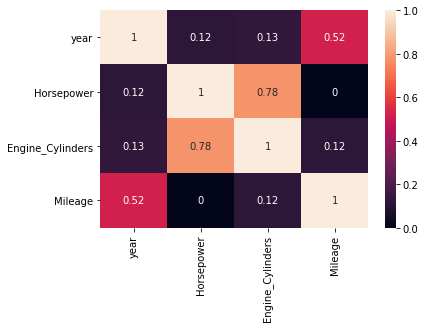

In [12]:
sns.heatmap(X.corr().abs().round(2),annot=True) #still high correlation, so try removing volume, now its bettersns.heatmap(df.corr().abs().round(2),annot=True) #still high correlation, so try removing volume, now its better

In [13]:
X = pd.get_dummies(data=X, drop_first=True)

In [14]:
X.head()

,year,Horsepower,Engine_Cylinders,Mileage,brand_BMW,brand_Chevrolet,brand_Chrysler,brand_Ford,brand_GAZ,brand_Honda,...,Interior_Color_Other color,Interior_Color_White,Interior_Color_YG,Interior_Color_black,Interior_Color_red,Gearbox_Mechanical,Gearbox_Robot,Gearbox_Variator:,Drive_train_Rear,Drive_train_Wheel drive
0,2010,181.0,4,88000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,118.0,6,190000.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,2008,286.0,6,170000.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2000,170.0,6,300000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2012,277.0,6,81000.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [15]:
y=df['price']

In [16]:
X = sm.add_constant(X) #?

In [17]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
model = sm.OLS(y_train, X_train).fit()

In [19]:
predictions = model.predict(X_test) 

In [20]:
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     240.3
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:33:23   Log-Likelihood:                -67115.
No. Observations:                7462   AIC:                         1.348e+05
Df Residuals:                    7193   BIC:                         1.366e+05
Df Model:                         268                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:
#as Rsquared is high and is close to ajusted Rsquared we dont need to simplify our model further

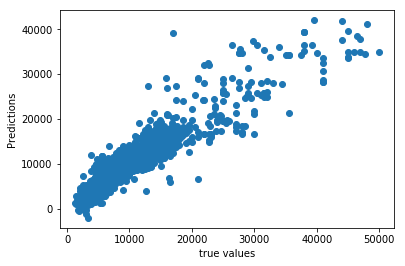

In [22]:
plt.scatter(y_test, predictions)
plt.xlabel('true values')
plt.ylabel('Predictions')
plt.show()

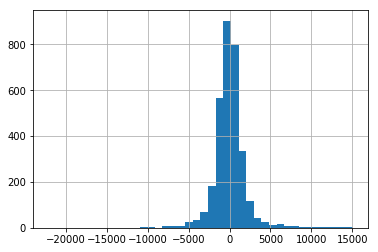

In [23]:
err=y_test-predictions#plotting errors , looks like normal with mean 0,
err.hist(bins = 40)

In [46]:
sqrt(mean_squared_error(y_test, predictions))#rmse

2073.729129780997